## Import packages

In [1]:
from keras.datasets import mnist
from tensorflow.keras.preprocessing.image import load_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [2]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
x_train[0].shape

(28, 28)

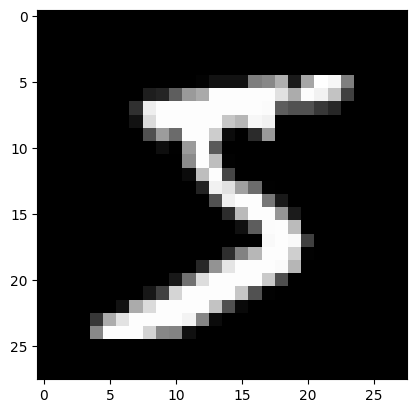

In [5]:
plt.imshow(x_train[0],cmap='gray')

In [6]:
y_train[0]

5

## Preprocessing the image data

In [7]:
image_height,image_width=28,28

In [8]:
x_train = x_train.reshape(60000,28,28,1)

In [9]:
x_test=x_test.reshape(10000,28,28,1)

In [10]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [11]:
print(x_train[0])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


In [12]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [13]:
x_train/=255.0
x_test/=255.0
print(x_train[0])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [15]:
y_train = to_categorical(y_train,10)
print(y_train.shape)
y_test= to_categorical(y_test,10)
print(y_test)

(60000, 10)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# **Build a base model**

In [16]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu'))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [17]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training
#Set Batch size
BATCH_SIZE=16
#Set number of epochs
EPOCHS=5
#Set validation split. 10% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.1
print("\nTraining Progress:\n------------------------------------")
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch
history=cnn.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)



Training Progress:
------------------------------------
Epoch 1/5
3375/3375 [==============================] - 326s 96ms/step - loss: 0.0953 - accuracy: 0.9716 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 2/5
3375/3375 [==============================] - 328s 97ms/step - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0409 - val_accuracy: 0.9897
Epoch 3/5
3375/3375 [==============================] - 328s 97ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0484 - val_accuracy: 0.9892
Epoch 4/5
3375/3375 [==============================] - 337s 100ms/step - loss: 0.0209 - accuracy: 0.9936 - val_loss: 0.0334 - val_accuracy: 0.9922
Epoch 5/5
3375/3375 [==============================] - 331s 98ms/step - loss: 0.0160 - accuracy: 0.9954 - val_loss: 0.0407 - val_accuracy: 0.9908


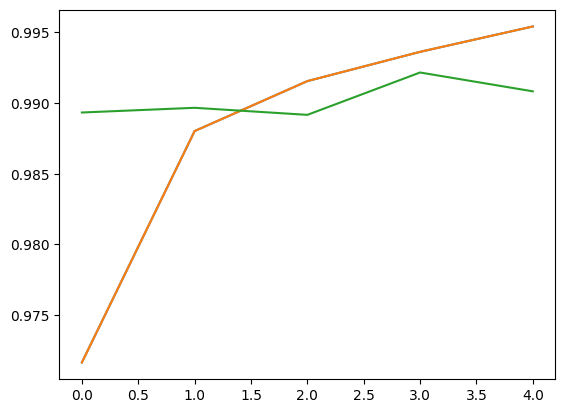

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [19]:
cnn2 = Sequential()
cnn2.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
cnn2.add(MaxPooling2D())
cnn2.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn2.add(MaxPooling2D())
cnn2.add(Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'))
cnn2.add(MaxPooling2D())
cnn2.add(Flatten())
cnn2.add(Dense(1024,activation='relu'))
cnn2.add(Dense(512,activation='relu'))
cnn2.add(Dense(10,activation='softmax'))
cnn2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          102464    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 64)        

In [20]:
history2=cnn2.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/5
3375/3375 [==============================] - 298s 88ms/step - loss: 0.1279 - accuracy: 0.9621 - val_loss: 0.0619 - val_accuracy: 0.9823
Epoch 2/5
3375/3375 [==============================] - 309s 92ms/step - loss: 0.0553 - accuracy: 0.9844 - val_loss: 0.0560 - val_accuracy: 0.9858
Epoch 3/5
3375/3375 [==============================] - 288s 85ms/step - loss: 0.0415 - accuracy: 0.9884 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 4/5
3375/3375 [==============================] - 285s 84ms/step - loss: 0.0329 - accuracy: 0.9909 - val_loss: 0.0656 - val_accuracy: 0.9872
Epoch 5/5
3375/3375 [==============================] - 280s 83ms/step - loss: 0.0307 - accuracy: 0.9919 - val_loss: 0.0515 - val_accuracy: 0.9913


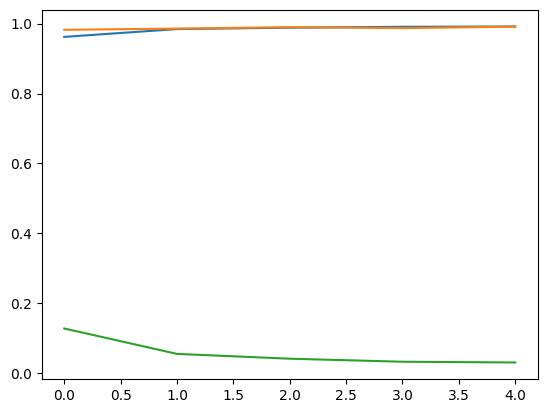

In [21]:
plt.plot(history2.history["accuracy"])
plt.plot(history2.history["val_accuracy"])
plt.plot(history2.history["loss"])

In [22]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
cnn3.add(MaxPooling2D())
cnn3.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn3.add(MaxPooling2D())
cnn3.add(Flatten())
cnn3.add(Dense(1024,activation='relu'))
cnn3.add(Dense(10,activation='tanh'))
cnn3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_5 (Dense)             (None, 1024)             

In [23]:
history3=cnn3.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/5
3375/3375 [==============================] - 327s 97ms/step - loss: 7.8952 - accuracy: 0.0961 - val_loss: 8.0268 - val_accuracy: 0.0960
Epoch 2/5
3375/3375 [==============================] - 326s 97ms/step - loss: 7.8939 - accuracy: 0.0960 - val_loss: 8.0268 - val_accuracy: 0.0960
Epoch 3/5
3375/3375 [==============================] - 328s 97ms/step - loss: 7.8939 - accuracy: 0.0960 - val_loss: 8.0268 - val_accuracy: 0.0960
Epoch 4/5
3375/3375 [==============================] - 325s 96ms/step - loss: 7.8939 - accuracy: 0.0960 - val_loss: 8.0268 - val_accuracy: 0.0960
Epoch 5/5
3375/3375 [==============================] - 330s 98ms/step - loss: 7.8939 - accuracy: 0.0960 - val_loss: 8.0268 - val_accuracy: 0.0960


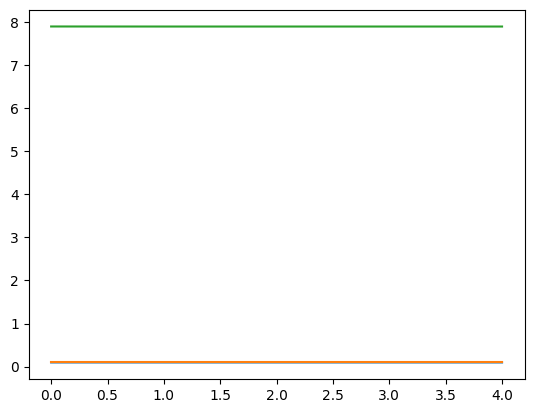

In [24]:
plt.plot(history3.history["accuracy"])
plt.plot(history3.history["val_accuracy"])
plt.plot(history3.history["loss"])


In [25]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(5,5), input_shape=(28,28,1), padding='same', activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D())
cnn4.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))
cnn4.add(MaxPooling2D())
cnn4.add(Flatten())
cnn4.add(Dense(1024,activation='relu'))
cnn4.add(Dropout(0.5))
cnn4.add(BatchNormalization())
cnn4.add(Dense(10,activation='tanh'))
cnn4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
cnn4.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                      

In [26]:
history4=cnn4.fit(x_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)


Epoch 1/5
3375/3375 [==============================] - 356s 105ms/step - loss: 7.1599 - accuracy: 0.1834 - val_loss: 8.8435 - val_accuracy: 0.2333
Epoch 2/5
3375/3375 [==============================] - 349s 103ms/step - loss: 7.4909 - accuracy: 0.1910 - val_loss: 10.0928 - val_accuracy: 0.2282
Epoch 3/5
3375/3375 [==============================] - 362s 107ms/step - loss: 7.6197 - accuracy: 0.1577 - val_loss: 7.9449 - val_accuracy: 0.1727
Epoch 4/5
3375/3375 [==============================] - 374s 111ms/step - loss: 7.8374 - accuracy: 0.1238 - val_loss: 10.8544 - val_accuracy: 0.1457
Epoch 5/5
3375/3375 [==============================] - 401s 119ms/step - loss: 8.7523 - accuracy: 0.1282 - val_loss: 10.2925 - val_accuracy: 0.2240


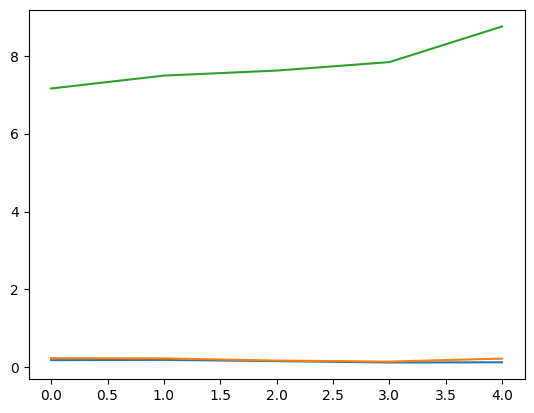

In [27]:
plt.plot(history4.history["accuracy"])
plt.plot(history4.history["val_accuracy"])
plt.plot(history4.history["loss"])
